In [1]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt

from readCanLitefileUtils import *
from calibUtils import *

In [2]:
def compute_CalibBiasV(df, df_calibparam, values):
    df = df.copy()
    a_coeff = 1.8535e-3
    b_coeff = 0
    LSBres = 1.8535e-3


    for val in values:
        #print(val)
        val_calib = val + '_calib'
    
        
        #compute ADC calibrated value in dec
        
        df[val] = df[val].apply(lambda x: int(x,16) )
        #df[val_calib] = ( df[val] + df_calibparam['Offset_Sig BiasV']) * (df_calibparam['Gain_Usig BiasV'] /32768) * a_coeff + b_coeff
        df[val_calib] = df[val] * 1.8535e-3
       

        #compare with the DMM value
        tmp_DMMlabel = val.replace('ADC', 'DMM')
        val_err = val + 'err'
        df[val_err] = df[tmp_DMMlabel]-df[val_calib]

        
        #compute error 
        val_sig = val + 'sigma'
        df[val_sig] = df[val_err]/LSBres
        
        
    return df

In [3]:
def drawplot(df, boardSN):
    plt.figure(figsize=(10,6))

    ax = plt.gca()


    ax = df_aftercalibtest.plot.scatter(x='index', y='ADC000sigma', color="DarkBlue", label="DAC000 sigma", ax=ax, marker = 'o', s=40)
    ax = df_aftercalibtest.plot.scatter(x='index', y='ADC3FFsigma', color="DarkGreen", label="DAC3FF sigma ", ax=ax, marker = 'o', s=40)
    ax = df_aftercalibtest.plot.scatter(x='index', y='ADCCFFsigma', color="Pink", label="DACCFF sigma", ax=ax, marker = 'o', s=40 )
    ax = df_aftercalibtest.plot.scatter(x='index', y='ADCFFFsigma', color="Orange", label="DACFFF sigma", ax=ax, marker = 'o', s=40 )

    ax = plt.hlines(1, -0.2, 11.5, linestyles='dotted', color='red')
    ax = plt.hlines(-1, -0.2, 11.5, linestyles='dotted', color='red')

    plt.grid(b=True)
    plt.title('Error/LSB per channel (' + boardSN + ')')
    plt.xlabel('Channel')
    plt.ylabel('Error/LSB')

    plt.show()

    return

# define the inputs

#board SN04
SN_board = 'SN04'

#file 1 (DACset 0x000)
file_DACset000 = './files/SN04_calib-test/21-05-18_121010_validcalibparam_SN04_dacset000.csv'

#file 2 (DACset 0x3FF)
file_DACset3FF = './files/SN04_calib-test/21-05-18_121010_validcalibparam_SN04_dacset3FF.csv'

#file 3 (DACset 0xCFF)
file_DACsetCFF = './files/SN04_calib-test/21-05-18_121010_validcalibparam_SN04_dacsetCFF.csv'

#file 4 (DACset 0xFFF)
file_DACsetFFF = './files/SN04_calib-test/21-05-18_121010_validcalibparam_SN04_dacsetFFF.csv'


DMM_000 = [108.75, 108.757, 108.742, 108.746, 108.745, 108.745, 
          108.737, 108.743, 108.747, 108.717, 108.727, 108.757]

DMM_3FF = [110.638, 110.643, 110.631, 110.635, 110.636, 110.637,
          110.627, 110.631, 110.640, 110.602, 110.619, 110.651]

DMM_CFF = [114.908, 114.915, 114.895, 114.895, 114.896, 114.892,
          114.892, 114.897, 114.902, 114.872, 114.882, 114.922]


DMM_FFF = [116.329, 116.334, 116.315, 116.319, 116.322, 116.313,
          116.310, 116.317, 116.322, 116.293, 116.302, 116.343]


MM_CFF = [114.908, 114.915, 114.895, 114.895, 114.896, 114.892,
          114.892, 114.897, 114.902, 114.872, 114.882, 114.922]


DMM_FFF = [116.329, 116.334, 116.315, 116.319, 116.322, 116.313,
          116.310, 116.317, 116.322, 116.293, 116.302, 116.343]


values = ['ADC000', 'ADC3FF', 'ADCCFF', 'ADCFFF']


df_calibparam = pd.read_csv('./calibDB/calib_biasV_SN04_v6_forcheck.csv',delimiter=',') 
df_calibparam.drop('Unnamed: 0', inplace=True, axis=1)

In [4]:
# define the inputs


##SN11
SN_board = 'SN11'

#file 1 (DACset 0x000)
file_DACset000 = './files/SN11/21-05-26_152152_validcalib_dacset000_v1.csv'

#file 2 (DACset 0x3FF)
file_DACset3FF = './files/SN11/21-05-26_152152_validcalib_dacset3FF_v1.csv'

#file 3 (DACset 0xCFF)
file_DACsetCFF = './files/SN11/21-05-26_152152_validcalib_dacsetCFF_v1.csv'

#file 4 (DACset 0xFFF)
file_DACsetFFF = './files/SN11/21-05-26_152152_validcalib_dacsetFFF_v1.csv'


DMM_000 = [108.715, 108.745, 108.749, 108.744, 108.739, 108.721, 
          108.736, 108.699, 108.750, 108.746, 108.743, 108.733]

DMM_3FF = [110.600, 110.631, 110.644, 110.636, 110.633, 110.615,
          110.624, 110.585, 110.638, 110.635, 110.636, 110.623]

DMM_CFF = [114.870, 114.895, 114.906, 114.901, 114.891, 114.871,
          114.888, 114.847, 114.904, 114.890, 114.897, 114.878]


DMM_FFF = [116.285, 116.312, 116.324, 116.321, 116.314, 116.291,
          116.311, 116.267, 116.328, 116.313, 116.319, 116.303]





values = ['ADC000', 'ADC3FF', 'ADCCFF', 'ADCFFF']


df_calibparam = pd.read_csv('./calibDB/calib_biasV_SN11_v2_forcheck.csv',delimiter=',') 
df_calibparam.drop('Unnamed: 0', inplace=True, axis=1)

In [5]:
# define the inputs


##SN15

SN_board = 'SN15'

#file 1 (DACset 0x000)
file_DACset000 = './files/SN15/21-05-27_165027_validcalib_dacset000_SN15_20x.csv'

#file 2 (DACset 0x3FF)
file_DACset3FF = './files/SN15/21-05-27_165027_validcalib_dacset3FF_SN15_20x.csv'

#file 3 (DACset 0xCFF)
file_DACsetCFF = './files/SN15/21-05-27_165027_validcalib_dacsetCFF_SN15_20x.csv'

#file 4 (DACset 0xFFF)
file_DACsetFFF = './files/SN15/21-05-27_165027_validcalib_dacsetFFF_SN15_20x.csv'


DMM_000 = [108.745, 108.715, 108.767, 108.730, 108.751, 108.717, 
          108.708, 108.713, 108.760, 108.729, 108.762, 108.727]

DMM_3FF = [110.636, 110.602, 110.656, 110.615, 110.640, 110.607,
          110.597, 110.604, 110.652, 110.625, 110.652, 110.612]

DMM_CFF = [114.900, 114.871, 114.923, 114.884, 114.910, 114.876,
          114.862, 114.874, 114.914, 114.883, 114.916, 114.879]


DMM_FFF = [116.319, 116.292, 116.345, 116.303, 116.330, 116.294,
          116.279, 116.292, 116.337, 116.305, 116.336, 116.299]





values = ['ADC000', 'ADC3FF', 'ADCCFF', 'ADCFFF']


df_calibparam = pd.read_csv('./calibDB/calib_biasV_SN15_v0_forcheck.csv',delimiter=',') 
df_calibparam.drop('Unnamed: 0', inplace=True, axis=1)

In [6]:
DACset000, ADC000, HV000 = GetADCvalues(file_DACset000)

DACset3FF, ADC3FF, HV3FF = GetADCvalues(file_DACset3FF)

DACsetCFF, ADCCFF, HVCFF = GetADCvalues(file_DACsetCFF)

DACsetFFF, ADCFFF, HVFFF = GetADCvalues(file_DACsetFFF)


In [7]:
df = pd.DataFrame(list(zip(ADC000, DMM_000, ADC3FF, DMM_3FF, ADCCFF, DMM_CFF, ADCFFF, DMM_FFF)), 
    columns = ['ADC000', 'DMM000' ,  'ADC3FF', 'DMM3FF', 'ADCCFF', 'DMMCFF', 'ADCFFF', 'DMMFFF'])
df

,ADC000,DMM000,ADC3FF,DMM3FF,ADCCFF,DMMCFF,ADCFFF,DMMFFF
0,e52c,108.745,e92d,110.636,f225,114.900,f52a,116.319
1,e435,108.715,e82c,110.602,f122,114.871,f41f,116.292
2,e53b,108.767,e936,110.656,f235,114.923,f534,116.345
3,e526,108.730,e920,110.615,f21e,114.884,f51c,116.303
4,e530,108.751,e92d,110.640,f22c,114.910,f52a,116.330
5,e51f,108.717,e919,110.607,f218,114.876,f515,116.294
6,e518,108.708,e913,110.597,f210,114.862,f50d,116.279
7,e51b,108.713,e917,110.604,f216,114.874,f512,116.292
8,e524,108.760,e92d,110.652,f221,114.914,f51b,116.337
9,e524,108.729,e924,110.625,f21d,114.883,f51b,116.305


In [8]:
df_aftercalibtest = compute_CalibBiasV(df, df_calibparam, values)
df_aftercalibtest.reset_index(inplace=True)
df_aftercalibtest  

,index,ADC000,DMM000,ADC3FF,DMM3FF,ADCCFF,DMMCFF,ADCFFF,DMMFFF,ADC000_calib,...,ADC000sigma,ADC3FF_calib,ADC3FFerr,ADC3FFsigma,ADCCFF_calib,ADCCFFerr,ADCCFFsigma,ADCFFF_calib,ADCFFFerr,ADCFFFsigma
0,0,58668,108.745,59693,110.636,61989,114.900,62762,116.319,108.741138,...,2.083626,110.640975,-0.004976,-2.684381,114.896611,0.003389,1.828163,116.329367,-0.010367,-5.593202
1,1,58421,108.715,59436,110.602,61730,114.871,62495,116.292,108.283323,...,232.898031,110.164626,0.437374,235.971945,114.416555,0.454445,245.182088,115.834482,0.457518,246.839763
2,2,58683,108.767,59702,110.656,62005,114.923,62772,116.345,108.768940,...,-1.046938,110.657657,-0.001657,-0.893984,114.926267,-0.003267,-1.762881,116.347902,-0.002902,-1.565687
3,3,58662,108.730,59680,110.615,61982,114.884,62748,116.303,108.730017,...,-0.009172,110.616880,-0.001880,-1.014297,114.883637,0.000363,0.195846,116.303418,-0.000418,-0.225519
4,4,58672,108.751,59693,110.640,61996,114.910,62762,116.330,108.748552,...,1.320745,110.640975,-0.000975,-0.526302,114.909586,0.000414,0.223361,116.329367,0.000633,0.341516
5,5,58655,108.717,59673,110.607,61976,114.876,62741,116.294,108.717042,...,-0.022930,110.603905,0.003095,1.669544,114.872516,0.003484,1.879687,116.290443,0.003557,1.918802
6,6,58648,108.708,59667,110.597,61968,114.862,62733,116.279,108.704068,...,2.121392,110.592784,0.004216,2.274346,114.857688,0.004312,2.326409,116.275615,0.003385,1.826005
7,7,58651,108.713,59671,110.604,61974,114.874,62738,116.292,108.709628,...,1.818991,110.600198,0.003802,2.050985,114.868809,0.005191,2.800647,116.284883,0.007117,3.839763
8,8,58660,108.760,59693,110.652,61985,114.914,62747,116.337,108.726310,...,18.176423,110.640975,0.011025,5.947936,114.889197,0.024803,13.381441,116.301564,0.035436,19.118155
9,9,58660,108.729,59684,110.625,61981,114.883,62747,116.305,108.726310,...,1.451308,110.624294,0.000706,0.380901,114.881783,0.001216,0.656326,116.301564,0.003436,1.853520


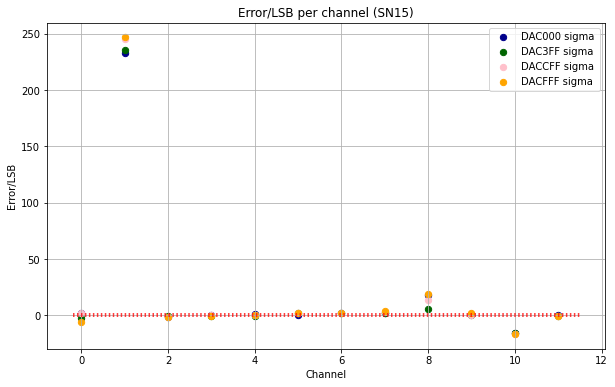

In [9]:
drawplot(df_aftercalibtest, SN_board)

In [10]:
df_aftercalibtest[['DMM000', 'ADC000_calib', 'ADC000sigma', 'DMM3FF', 'ADC3FF_calib', 'ADC3FFsigma', 'DMMCFF', 'ADCCFF_calib', 'ADCCFFsigma']]


,DMM000,ADC000_calib,ADC000sigma,DMM3FF,ADC3FF_calib,ADC3FFsigma,DMMCFF,ADCCFF_calib,ADCCFFsigma
0,108.745,108.741138,2.083626,110.636,110.640975,-2.684381,114.900,114.896611,1.828163
1,108.715,108.283323,232.898031,110.602,110.164626,235.971945,114.871,114.416555,245.182088
2,108.767,108.768940,-1.046938,110.656,110.657657,-0.893984,114.923,114.926267,-1.762881
3,108.730,108.730017,-0.009172,110.615,110.616880,-1.014297,114.884,114.883637,0.195846
4,108.751,108.748552,1.320745,110.640,110.640975,-0.526302,114.910,114.909586,0.223361
5,108.717,108.717042,-0.022930,110.607,110.603905,1.669544,114.876,114.872516,1.879687
6,108.708,108.704068,2.121392,110.597,110.592784,2.274346,114.862,114.857688,2.326409
7,108.713,108.709628,1.818991,110.604,110.600198,2.050985,114.874,114.868809,2.800647
8,108.760,108.726310,18.176423,110.652,110.640975,5.947936,114.914,114.889197,13.381441
9,108.729,108.726310,1.451308,110.625,110.624294,0.380901,114.883,114.881783,0.656326


In [15]:
df_aftercalibtest[['ADC000sigma',  'ADC3FFsigma', 'ADCCFFsigma', 'ADCFFFsigma']]

,ADC000sigma,ADC3FFsigma,ADCCFFsigma,ADCFFFsigma
0,1.898031,-3.107095,-3.357432,4.063124
1,0.083626,4.618020,16.130564,19.630159
2,15.241705,19.631778,18.065282,21.104397
3,-0.455894,4.315619,13.367683,17.485838
4,-1.153493,5.697060,17.972484,21.709199
5,0.135150,1.985703,5.182088,6.300243
6,1.227947,0.841381,0.353925,1.090639
7,0.265714,-1.199892,-0.766388,-0.648233
8,4.781225,-7.605341,-12.013758,-15.737524
9,16.623145,24.776099,24.432965,29.169679
